In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import tqdm
import itertools 
from ipywidgets import widgets
from joblib import Parallel, delayed
import os

In [3]:
df_features_combined = pd.read_pickle('/data/temp/athira/dlc_analysis/feats_combined_glutgaba_drugs_Jan31.pickle')

In [4]:
df_features_combined.drug.unique()

array(['Wildtype', 'DL-THA1mM', 'Stiripentol50uM', 'PTZ100uM',
       'Baclofen50uM', 'Strychnine10uM', 'KynurenicAcid100uM',
       'Perampanel15uM', 'ValproidAcid50uM', 'PTZ1mM', 'Propranol50uM',
       'Picrotoxin100uM', 'Picrotoxin1mM', 'ValproicAcid50mM',
       'Bicucullin100uM', 'DMSO', 'Reserpine65uM', 'Ketamine100uM',
       'Ketanserin500nM', 'Metoprolol100uM', 'GYKI5246620uM',
       'Phenoxybenzamine100uM', 'NBQX10uM', 'Lamotrigineisethionate100uM',
       'CNQX100uM', 'GYKI53655100uM', 'AP5100uM', 'PCD100uM'],
      dtype=object)

In [5]:
# df_features_combined

In [6]:
params_list =  ['curv_neck',
'curv_tail_base',
'curv_tail_pre_mid',
'curv_tail_mid',
'curv_tail_post_mid',
'curv_tail_tip',
'speed_neck',   
'speed_tail_base',   
'speed_tail_pre_mid',
'speed_tail_mid',
'speed_tail_post_mid',
'speed_tail_tip',
'rel_tan_neck',
'rel_tan_tail_base',
'rel_tan_tail_pre_mid',
'rel_tan_tail_mid',
'rel_tan_tail_post_mid',
'rel_tan_tail_tip',
'ects_1',
'ects_2',
'ects_3',
'ects_4',
'ects_5',
'ects_6',
'quirkness']

In [ ]:
results_folder_meike = '/data/temp/athira/dlc_analysis/Results/results_drugs_glutgaba_for_meike/'

# Wild type characterization

In [ ]:
df_features_control = df_features_combined[df_features_combined['drug'] == 'Wildtype'] 

In [ ]:
df_features_control.columns

## Fig1a

In [ ]:
feat_names_dict = {'curv':'Curvature', 'speed': 'Speed', 'rel_tan': 'Relative tangent angles'}
feat_short_dict = {'curv':'c', 'speed':'s', 'rel_tan':'rta', 'ects':'EC' }
df_control_zf_dict = {}

In [ ]:
cpal = sns.color_palette("hls",9)
color_pal = [cpal[0], cpal[3], cpal[4], cpal[5], cpal[6], cpal[7]]
# color_pal_dict = {'neck':cpal[0], 'tail_base':cpal[3], 'tail_pre_mid':cpal[4], 'tail_mid':cpal[5], 'tail_post_mid':cpal[6], 'tail_tip':cpal[7]}

sns.palplot(color_pal)

In [ ]:


for i, feat in tqdm.tqdm(enumerate(['curv', 'speed', 'rel_tan'])):
    
    feat_s = feat_short_dict[feat]
    
    df_feat_control = df_features_control.filter(items = [f"{feat}_neck",f"{feat}_tail_base", f"{feat}_tail_pre_mid",
                                                f"{feat}_tail_mid", f"{feat}_tail_post_mid", f"{feat}_tail_tip"])
    df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
    df_feat_control_zf = df_feat_control_zf.filter(items = [f"{feat}_neck",f"{feat}_tail_base", f"{feat}_tail_pre_mid",
                                                f"{feat}_tail_mid", f"{feat}_tail_post_mid", f"{feat}_tail_tip"])

    col_rename_dict = {f"{feat}_neck" : f"{feat_s}N",
                       f"{feat}_tail_base" :f"{feat_s}TB", 
                       f"{feat}_tail_pre_mid" : f"{feat_s}TprM",      
                       f"{feat}_tail_mid": f"{feat_s}TM", 
                       f"{feat}_tail_post_mid": f"{feat_s}TpoM", 
                       f"{feat}_tail_tip": f"{feat_s}TT"}
    

        
    df_feat_control_zf.rename(columns= col_rename_dict, inplace=True)
    df_control_zf_dict[feat] = df_feat_control_zf

In [ ]:
df_control_zf_dict.keys()

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (24, 10))
for i, feat in tqdm.tqdm(enumerate(['curv', 'speed', 'rel_tan'])):
    
    df_feat_control_zf = df_control_zf_dict[feat]
    if feat == 'curv':
        df_feat_control_zf = df_feat_control_zf * (1/11.56)
    elif feat == 'speed':
        df_feat_control_zf = df_feat_control_zf * (346.80)
    sns.boxplot(data = df_feat_control_zf, ax=axes[i], palette= color_pal, showfliers = False)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=30, size = 'x-large')
    axes[i].set_ylabel(feat_names_dict[feat], size = 'xx-large')
    plt.setp(axes[i].collections, alpha=.5)

In [ ]:
fig.savefig(os.path.join(results_folder_meike,'fig1a_Wildtype.png'))

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (24, 10))
for i, feat in tqdm.tqdm(enumerate(['curv', 'speed', 'rel_tan'])):
    
    df_feat_control_zf = df_control_zf_dict[feat]
    if feat == 'curv':
        df_feat_control_zf = df_feat_control_zf * (1/11.56)
        df_feat_control_zf[df_feat_control_zf.abs() > 5] = 0
    elif feat == 'speed':
        df_feat_control_zf = df_feat_control_zf * (346.80)
        df_feat_control_zf[df_feat_control_zf.abs() > 5000] = 0
    sns.violinplot(data = df_feat_control_zf, ax=axes[i], palette= color_pal, alpha = 0.1)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=30, size = 'x-large')
    axes[i].set_ylabel(feat_names_dict[feat], size = 'xx-large')
    plt.setp(axes[i].collections, alpha=.5)

## Playing with quartiles

In [ ]:

Q1 = df_features_control.quantile(0.25, axis =0)
Q3 = df_features_control.quantile(0.75, axis =0)
    
IQR = Q3 - Q1
IQR

# df_melted_wo_out = 

In [ ]:
df_low_thresh = Q1 - 1.5 * IQR
df_high_thresh = Q3 + 1.5 * IQR

In [ ]:
df_low_thresh.filter(like='ects_')

In [ ]:
df_feat_control = df_features_control.filter(like='ects_')

In [ ]:
df_feat_control_woo = df_feat_control[(df_feat_control > df_low_thresh.filter(like='ects_'))&
                                      (df_feat_control < df_high_thresh.filter(like='ects_'))]

In [ ]:
df_melted = pd.melt(df_feat_control_woo, var_name= 'coeff', value_name= 'ects')

In [ ]:
df_melted

In [ ]:
df_melted.dropna(inplace=True)

In [ ]:
df_melted.min()

In [ ]:
fig2, ax2 = plt.subplots(1,1, figsize = (15, 10))
sns.violinplot(data = df_melted, x = 'coeff', y= 'ects', ax=ax2, palette=sns.color_palette('Set2',6), cut=0)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, size = 'x-large')
ax2.set_ylabel('Eigen cofficient value', size = 'xx-large')
ax2.set_xlabel('Coefficient', size = 'xx-large')
plt.setp(ax2.collections, alpha=.8)

## Fig 1b

In [ ]:
col_rename_dict2 = {}

for item in df_feat_control_zf.keys():
    num = item.split('_')[1]
    col_rename_dict2[item] = f'EC{num}'


In [ ]:
df_feat_control = df_features_control.filter(like='ects_')
df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
df_feat_control_zf = df_feat_control_zf.filter(like='ects_')
df_feat_control_zf.rename(columns=col_rename_dict2, inplace=True)

df_melted = pd.melt(df_feat_control_zf, var_name= 'coeff', value_name= 'ects')
# with sns.axes_style("darkgrid"):

In [ ]:
fig2, ax2 = plt.subplots(1,1, figsize = (15, 10))
sns.boxplot(data = df_melted, x = 'coeff', y= 'ects', ax=ax2, palette=sns.color_palette('Set2',6), 
            showfliers=False)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, size = 'x-large')
ax2.set_ylabel('Eigen cofficient value', size = 'xx-large')
ax2.set_xlabel('Coefficient', size = 'xx-large')
plt.setp(ax2.collections, alpha=.8)

In [ ]:
fig2.savefig(os.path.join(results_folder_meike,'fig1b_Wildtype.png'))

In [ ]:
# fig2, ax2 = plt.subplots(1,1, figsize = (15, 10))
# sns.violinplot(data = df_melted, x = 'coeff', y= 'ects', ax=ax2, palette=sns.color_palette('Set2',6))
# ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, size = 'x-large')
# ax2.set_ylabel('Eigen cofficient value', size = 'xx-large')
# ax2.set_xlabel('Coefficient', size = 'xx-large')
# plt.setp(ax2.collections, alpha=.8)

## Quirkiness

In [ ]:
corn_b = sns.color_palette("tab10",9)[0]
df_feat_control = df_features_control.filter(like='quirkness')
# df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
df_feat_control_zf = df_feat_control

with sns.axes_style("darkgrid"):
    fig3, ax3 = plt.subplots(1,1, figsize = (5, 10))
    sns.boxplot(data = df_feat_control_zf, color= corn_b, showfliers= False ,ax = ax3 )
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)
    ax3.set_ylabel('Quirkiness', size = 'xx-large')
    ax3.axes.xaxis.set_visible(False)

In [ ]:
fig3.savefig(os.path.join('/data/temp/athira/dlc_analysis/Results/results_Meike/fig1c_Wildtype.png'))

In [ ]:
# corn_b = sns.color_palette("tab10",9)[0]
# df_feat_control = df_features_control.filter(like='quirkness')
# df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
# df_feat_control_zf = df_feat_control_zf.filter(like='quirkness')

with sns.axes_style("darkgrid"):
    fig4, ax3 = plt.subplots(1,1, figsize = (8, 10))
    sns.violinplot(data = df_feat_control_zf, color= corn_b, alpha = 0.5, ax = ax3 )
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)
    ax3.set_ylabel('Quirkiness', size = 'xx-large')
    ax3.axes.xaxis.set_visible(False)

In [ ]:
fig4.savefig(os.path.join(results_folder_meike,'fig1c_violin_Wildtype.png'))

# Drugs vs control 

In [ ]:
df_features_combined.columns

## SMD 

In [7]:
drugs_list = list(df_features_combined.drug.unique())
drugs_list

['Wildtype',
 'DL-THA1mM',
 'Stiripentol50uM',
 'PTZ100uM',
 'Baclofen50uM',
 'Strychnine10uM',
 'KynurenicAcid100uM',
 'Perampanel15uM',
 'ValproidAcid50uM',
 'PTZ1mM',
 'Propranol50uM',
 'Picrotoxin100uM',
 'Picrotoxin1mM',
 'ValproicAcid50mM',
 'Bicucullin100uM',
 'DMSO',
 'Reserpine65uM',
 'Ketamine100uM',
 'Ketanserin500nM',
 'Metoprolol100uM',
 'GYKI5246620uM',
 'Phenoxybenzamine100uM',
 'NBQX10uM',
 'Lamotrigineisethionate100uM',
 'CNQX100uM',
 'GYKI53655100uM',
 'AP5100uM',
 'PCD100uM']

In [8]:
len(drugs_list)

28

In [9]:
df_medians = df_features_combined.groupby(by='drug', as_index=True)[params_list].median()

In [10]:
df_mad = df_features_combined.groupby(by='drug', as_index=True)[params_list].mad()

In [11]:
list_smd_dicts = []
for param in sorted(params_list):
    
    smd_dict = {}
    smd_dict['param'] = param
    
    
    for drug in drugs_list:
        if (drug != 'Wildtype'):
            if (drug == 'Propranol50uM')|(drug == 'DMSO'):
                control_median = df_medians.loc['Wildtype'][param]
                control_mad = df_mad.loc['Wildtype'][param]
            else :
                control_median = df_medians.loc['DMSO'][param]
                control_mad = df_mad.loc['DMSO'][param]

            drug_median = df_medians.loc[drug][param]
            drug_mad = df_mad.loc[drug][param]

            smd_dict[drug] = (drug_median - control_median) / (drug_mad + control_mad)
        
    list_smd_dicts.append(smd_dict)

In [12]:
smd_df  = pd.DataFrame(list_smd_dicts).set_index('param')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
drugs_wo_control = drugs_list
drugs_wo_control.remove('Wildtype')
# drugs_wo_control.remove('DMSO')

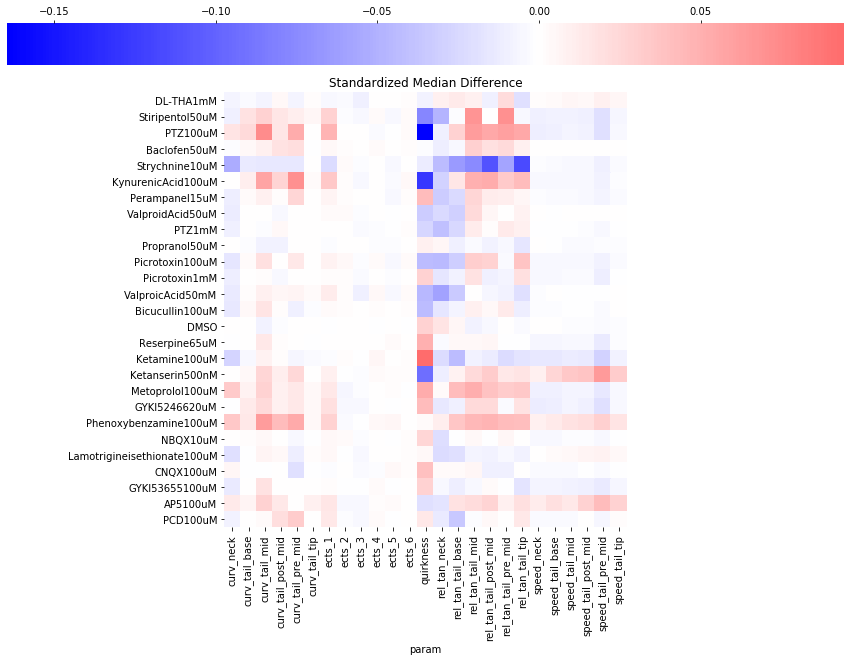

In [15]:

fig, axes = plt.subplots(1,1, figsize = (15, 10))
sns.heatmap(smd_df.loc[sorted(params_list)][drugs_wo_control].T, cmap= 'bwr', 
            square=True, ax=axes, center=0, cbar = True, cbar_kws = dict(use_gridspec=False,location="top"))
axes.set_title('Standardized Median Difference')
fig.savefig(os.path.join(results_folder_meike, 'smd.png'))

In [ ]:
fig_cluster = sns.clustermap(smd_df.loc[sorted(params_list)][drugs_wo_control].T, cmap= 'bwr', col_cluster=False)
plt.savefig('')

In [ ]:
# Curvatures (Postures-2)
sns.clustermap(smd_df.loc[['curv_neck','curv_tail_base','curv_tail_pre_mid','curv_tail_mid','curv_tail_post_mid','curv_tail_tip']][drugs_wo_control].T, 
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

In [ ]:
# Ects & Quirkiness (Postures-1)
sns.clustermap(smd_df.loc[['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6', 'quirkness']][drugs_wo_control].T, 
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

In [ ]:
# Speeds
sns.clustermap(smd_df.loc[['speed_neck','speed_tail_base','speed_tail_pre_mid','speed_tail_mid','speed_tail_post_mid','speed_tail_tip']][drugs_wo_control].T,
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

In [ ]:
# rel_tans
sns.clustermap(smd_df.loc[['rel_tan_neck','rel_tan_tail_base','rel_tan_tail_pre_mid','rel_tan_tail_mid','rel_tan_tail_post_mid','rel_tan_tail_tip']][drugs_wo_control].T,
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

## Stat tests

In [16]:
from scipy.stats import mannwhitneyu

In [20]:
len(drugs_list)

27

In [17]:
def test_drugs_mannwhitney(drug, params_list, _tail):
    
    pvalues_dict = {}
    pvalues_dict['drug'] = drug
    
    if ((drug == 'Propranol50uM')|(drug == 'DMSO')):
        control = 'Wildtype'
    else:
        control = 'DMSO'
    
    for param in params_list:
        
        results = mannwhitneyu(*[df_features_combined[param][df_features_combined["drug"] == group].values 
                         for group in [control,drug]], alternative= _tail)
        
        pvalues_dict[param] = results[-1]
        
        
    return pvalues_dict

In [18]:
drugs_wo_wildtype = drugs_list
drugs_wo_wildtype.remove('Wildtype')


ValueError: list.remove(x): x not in list

In [ ]:
params_list

#### Two-tailed

In [21]:
mannwhitney_combo_list = Parallel(n_jobs=len(drugs_wo_wildtype), verbose = 5)(delayed(test_drugs_mannwhitney)(drug, params_list,'two-sided') 
                                                          for drug in drugs_wo_wildtype)

[Parallel(n_jobs=27)]: Using backend LokyBackend with 27 concurrent workers.
[Parallel(n_jobs=27)]: Done   4 out of  27 | elapsed:  5.6min remaining: 32.2min
[Parallel(n_jobs=27)]: Done  10 out of  27 | elapsed:  6.4min remaining: 10.9min
[Parallel(n_jobs=27)]: Done  16 out of  27 | elapsed:  7.1min remaining:  4.9min
[Parallel(n_jobs=27)]: Done  22 out of  27 | elapsed:  7.8min remaining:  1.8min
[Parallel(n_jobs=27)]: Done  27 out of  27 | elapsed:  9.1min finished


In [22]:
df_pval_mannwhitney = pd.DataFrame(mannwhitney_combo_list)
df_pval_mannwhitney.set_index('drug', inplace = True)

# Bonferroni correction
bf_corr_pvalue = 0.05/len(df_pval_mannwhitney.index) 
df_binary_bf = df_pval_mannwhitney > bf_corr_pvalue



In [ ]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_binary_bf.loc[drugs_wo_wildtype][sorted(params_list)] , cmap = 'PiYG', linewidths=.5,
            annot = df_pval_mannwhitney.loc[drugs_wo_wildtype][sorted(params_list)], ax= axes, cbar = False)
plt.tight_layout()

#### Less

In [23]:
mwu_combo_list_less = Parallel(n_jobs=len(drugs_wo_wildtype), verbose = 5)(delayed(test_drugs_mannwhitney)(drug, params_list, 'less') 
                                                          for drug in drugs_wo_wildtype)

df_pval_mwu_less = pd.DataFrame(mwu_combo_list_less)
df_pval_mwu_less.set_index('drug', inplace = True)
df_binary_bf_less = df_pval_mwu_less > bf_corr_pvalue

[Parallel(n_jobs=27)]: Using backend LokyBackend with 27 concurrent workers.
[Parallel(n_jobs=27)]: Done   4 out of  27 | elapsed:  3.8min remaining: 21.9min
[Parallel(n_jobs=27)]: Done  10 out of  27 | elapsed:  4.7min remaining:  7.9min
[Parallel(n_jobs=27)]: Done  16 out of  27 | elapsed:  5.6min remaining:  3.9min
[Parallel(n_jobs=27)]: Done  22 out of  27 | elapsed:  6.4min remaining:  1.5min
[Parallel(n_jobs=27)]: Done  27 out of  27 | elapsed:  7.5min finished


In [ ]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_binary_bf_less.loc[drugs_wo_wildtype][sorted(params_list)] , cmap = 'PiYG', linewidths=.5,
            annot = df_pval_mwu_less.loc[drugs_wo_wildtype][sorted(params_list)], ax= axes, cbar = False)
plt.tight_layout()

In [ ]:
sns.clustermap(df_binary_bf_less.loc[sorted(drugs_wo_wildtype)][params_list].T, cmap= 'bwr', row_cluster=False)
axes.set_title('Clustermap using significance trends')

#### Greater 

In [24]:
mwu_combo_list_greater = Parallel(n_jobs=len(drugs_wo_wildtype), verbose = 5)(delayed(test_drugs_mannwhitney)(drug, params_list, 'greater') 
                                                          for drug in drugs_wo_wildtype)
df_pval_mwu_greater = pd.DataFrame(mwu_combo_list_greater)
df_pval_mwu_greater.set_index('drug', inplace = True)
df_binary_bf_greater = df_pval_mwu_greater > bf_corr_pvalue

[Parallel(n_jobs=27)]: Using backend LokyBackend with 27 concurrent workers.
[Parallel(n_jobs=27)]: Done   4 out of  27 | elapsed:  3.8min remaining: 21.7min
[Parallel(n_jobs=27)]: Done  10 out of  27 | elapsed:  4.8min remaining:  8.1min
[Parallel(n_jobs=27)]: Done  16 out of  27 | elapsed:  5.8min remaining:  4.0min
[Parallel(n_jobs=27)]: Done  22 out of  27 | elapsed:  6.5min remaining:  1.5min
[Parallel(n_jobs=27)]: Done  27 out of  27 | elapsed:  7.5min finished


In [ ]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_binary_bf_greater.loc[drugs_wo_wildtype][sorted(params_list)] , cmap = 'PiYG', linewidths=.5,
            annot = df_pval_mwu_greater.loc[drugs_wo_wildtype][sorted(params_list)], ax= axes, cbar = False)
plt.tight_layout()

#### Save test data 

In [25]:
writer = pd.ExcelWriter(os.path.join(results_folder_meike,'stats_data/pvalues_mannwhitneyu_drugs_all.xlsx'), 
                        engine='openpyxl')

# Write each dataframe to a different worksheet.
df_pval_mannwhitney.to_excel(writer, sheet_name='Two_tailed')
df_pval_mwu_less.to_excel(writer, sheet_name='Less')
df_pval_mwu_greater.to_excel(writer, sheet_name='Greater')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [26]:
df_pval_mannwhitney.to_pickle(os.path.join(results_folder_meike,'stats_data/mwu_pval_drugs_twosided.pickle'))
df_pval_mwu_less.to_pickle(os.path.join(results_folder_meike,'stats_data/mwu_pval_drugs_less.pickle'))
df_pval_mwu_greater.to_pickle(os.path.join(results_folder_meike,'stats_data/mwu_pval_drugs_greater.pickle'))

In [ ]:
# df_binary_bf.to_pickle('./Results_30072021/drugs_pvals_all_for_figures/mwu_test_drugs_twosided.pickle')
# df_binary_bf_less.to_pickle('./Results_30072021/drugs_pvals_all_for_figures/mwu_test_drugs_less.pickle')
# df_binary_bf_greater.to_pickle('./Results_30072021/drugs_pvals_all_for_figures/mwu_test_drugs_greater.pickle')

## Violin plots

In [ ]:
# Q1 = df_features_combined.groupby('drug').quantile(0.25)
# Q3 = df_features_combined.groupby('drug').quantile(0.75)
    
# IQR = Q3 - Q1
# df_low_thresh = Q1 - 1.5 * IQR
# df_high_thresh = Q3 + 1.5 * IQR

In [ ]:
# df_feat_control_woo = df_feat_control[(df_feat_control > df_low_thresh.filter(like='ects_'))&
#                                       (df_feat_control < df_high_thresh.filter(like='ects_'))]

In [27]:
def make_a_melted_df(main_df, param, drug_list):
    
    list_to_melt = []
    params_df = main_df.filter(items=['drug', param, f'{param}_zscore'])
    
    for drug in drug_list:
        
        if ((drug == 'Propranol50uM')|(drug == 'DMSO')):
            control = 'Wildtype'
        else:
            control = 'DMSO'
        
        # Select only those rows which are relevant to the particular drug 
        drug_df = params_df[(params_df['drug']==control)|(params_df['drug']==drug)]
        
        # Select those rows which have an acceptable zscore
#         drug_df = drug_df[drug_df[f'{param}_zscore'] < 3]
#         drug_df.drop(columns=f'{param}_zscore', inplace=True)
        
        # Append a column as drug_screened
        drug_df['test_drug'] = drug
        
        # Rename the drug column
        drug_df['drug']= drug_df.drug.apply(lambda x: 'drug' if x==drug else 'control')
        
        list_to_melt.append(drug_df)
    
    melted_param_df = pd.concat(list_to_melt)
    return melted_param_df      


In [28]:
dict_featnames = {'curv_neck':'cN',
 'curv_tail_base':'cTB',
 'curv_tail_pre_mid':'cTprM',
 'curv_tail_mid':'cTM',
 'curv_tail_post_mid':'cTpoM',
 'curv_tail_tip':'cTT',
 'speed_neck':'sN',
 'speed_tail_base':'sTB',
 'speed_tail_pre_mid':'sTprM',
 'speed_tail_mid':'sTM',
 'speed_tail_post_mid':'sTpoM',
 'speed_tail_tip':'sTT',
 'rel_tan_neck':'rtaN',
 'rel_tan_tail_base':'rtaTB',
 'rel_tan_tail_pre_mid':'rtaTprM',
 'rel_tan_tail_mid':'rtaTM',
 'rel_tan_tail_post_mid':'rtaTpoM',
 'rel_tan_tail_tip':'rtaTT',
 'ects_1':'EC1',
 'ects_2':'EC1',
 'ects_3':'EC1',
 'ects_4':'EC1',
 'ects_5':'EC1',
 'ects_6':'EC1',
 'quirkness':'Quirkiness'}

In [31]:
def plot_comparitive_violins(param):
    
    violin_height = 4
        
    list_drugs = []
    dict_drugs = {}

    list_drugs1 = list(df_binary_bf.index[(~df_binary_bf[param]==True)&
                                     (~df_binary_bf_less[param]==True)&
                                     (~df_binary_bf_greater[param]==False)].values)
    if list_drugs1:
        list_drugs.extend(list_drugs1)
        dict_drugs['g'] = list_drugs1

    list_drugs2 = list(df_binary_bf.index[(~df_binary_bf[param]==True)&
                                     (~df_binary_bf_greater[param]==True)&
                                     (~df_binary_bf_less[param]==False)].values)
    if list_drugs2:
        list_drugs.extend(list_drugs2)
        dict_drugs['l'] = list_drugs2

    
    n_drugs = len(list_drugs1) + len(list_drugs2) 
#         n_plots = (len(list_drugs1)!=0) + (len(list_drugs2)!=0) + (len(list_drugs3)!=0)

    n_plots = len(list(dict_drugs.keys()))
    
    if n_plots != 0:
        

        
        fig, axes = plt.subplots(1,1, figsize=(violin_height*n_drugs/2, violin_height))
        
        
        melted_param_df = make_a_melted_df(df_features_combined, param, list_drugs)
        if 'speed_' in param: 
            melted_param_df[param] = melted_param_df[param] * (346.80)
            sns.boxplot(data=melted_param_df, x='test_drug',y=param, hue='drug', hue_order = ['control', 'drug'],
                                        showfliers = False, ax=axes)
        elif 'curv_' in param:
            melted_param_df[param] = melted_param_df[param] * (1/11.56)
            sns.boxplot(data=melted_param_df, x='test_drug',y=param, hue='drug', hue_order = ['control', 'drug'],
                                    showfliers = False, ax=axes)
        else:
            sns.boxplot(data=melted_param_df, x='test_drug',y=param, hue='drug', hue_order = ['control', 'drug'],
                                    showfliers = False, ax=axes)

#         sns.despine(offset=10, trim=True)
        
        axes.set_title(f'{list_drugs2}', size = 'xx-large')
#         axes.set_xticklabels(new_labels, size = 'x-large', rotation=30)
        axes.set_ylabel(dict_featnames[param], size = 'xx-large')

        
        plt.tight_layout()
        fig.savefig(os.path.join('/data/temp/athira/dlc_analysis/Results/results_drugs_glutgaba_for_meike/',f'Suppfig1_{param}.svg'))
        fig.savefig(os.path.join('/data/temp/athira/dlc_analysis/Results/results_drugs_glutgaba_for_meike/',f'Suppfig1_{param}.png'))

        return None

In [32]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6','quirkness'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:  4.7min remaining: 11.7min
[Parallel(n_jobs=7)]: Done   4 out of   7 | elapsed:  5.0min remaining:  3.8min
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:  5.4min finished


In [33]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['curv_neck','curv_tail_base','curv_tail_pre_mid','curv_tail_mid',
                                      'curv_tail_post_mid','curv_tail_tip'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of   6 | elapsed:  4.2min remaining:  4.2min
[Parallel(n_jobs=7)]: Done   6 out of   6 | elapsed:  4.6min finished


In [34]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['speed_neck','speed_tail_base','speed_tail_pre_mid','speed_tail_mid',
                                      'speed_tail_post_mid','speed_tail_tip'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of   6 | elapsed:  4.5min remaining:  4.5min
[Parallel(n_jobs=7)]: Done   6 out of   6 | elapsed:  4.6min finished


In [35]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['rel_tan_neck','rel_tan_tail_base','rel_tan_tail_pre_mid','rel_tan_tail_mid',
                                      'rel_tan_tail_post_mid','rel_tan_tail_tip'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of   6 | elapsed:  4.2min remaining:  4.2min
[Parallel(n_jobs=7)]: Done   6 out of   6 | elapsed:  4.5min finished


In [ ]:
image_name = os.path.join('/data/temp/athira/dlc_analysis/Results/results_drugs_glutgaba_for_meike/',f'Suppfig1_curv_neck.png')
from IPython.display import Image, display
display(Image(image_name))